## 資料介紹

我們剛剛被一家隧道鑽孔公司聘請，該公司使用X射線嘗試了解岩石密度，理想情況下，這將允許他們在鑽探設備之前更換鑽頭，從而提高效率！

<img src='boring.jpg' height=400>

他們給我們提供了一些實驗室測試結果，這些結果顯示了不同岩石密度類型測試時傳感器返回的信號強度（以nHz為單位）。你會注意到它幾乎具有正弦波的關係，信號強度隨密度振盪，研究人員也不確定為什麼會這樣，但

（圖片描述為隧道鑽孔的相關設備或過程，顯示了隧道鑽孔的具體情形。）

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./rock_density_xray.csv")
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


<Axes: xlabel='Signal', ylabel='Density'>

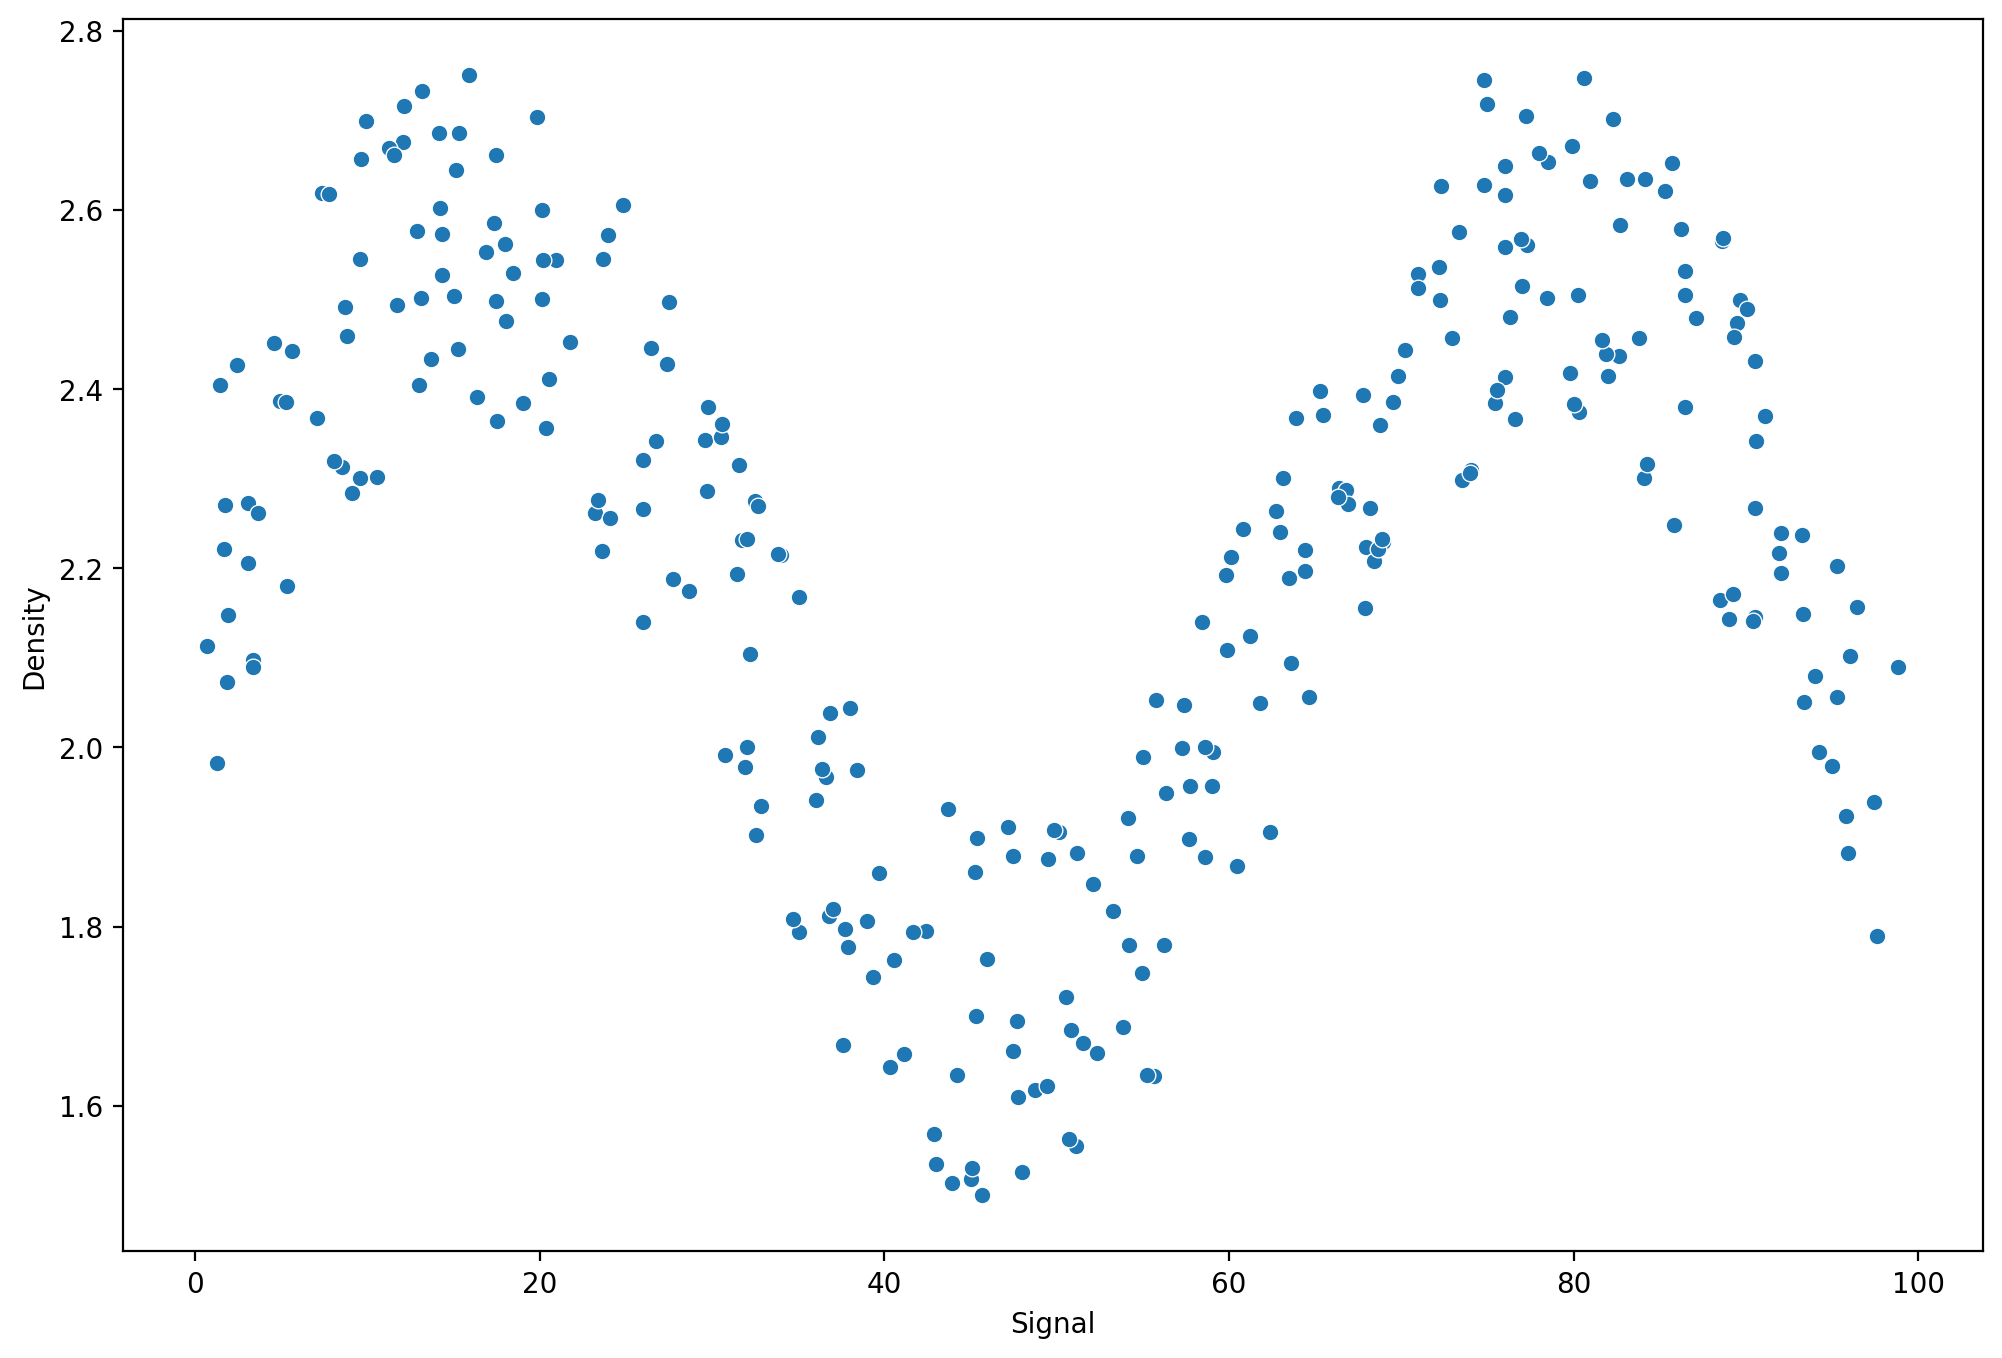

In [3]:
df.columns=['Signal',"Density"]
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df)

In [4]:
from sklearn.model_selection import train_test_split
X = df['Signal'].values.reshape(-1,1)  
y = df['Density']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [5]:
from sklearn.metrics import mean_squared_error
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')
    
    # Plot results
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    
    plt.figure(figsize=(12,6),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,output)

RMSE : 0.13545169497601628


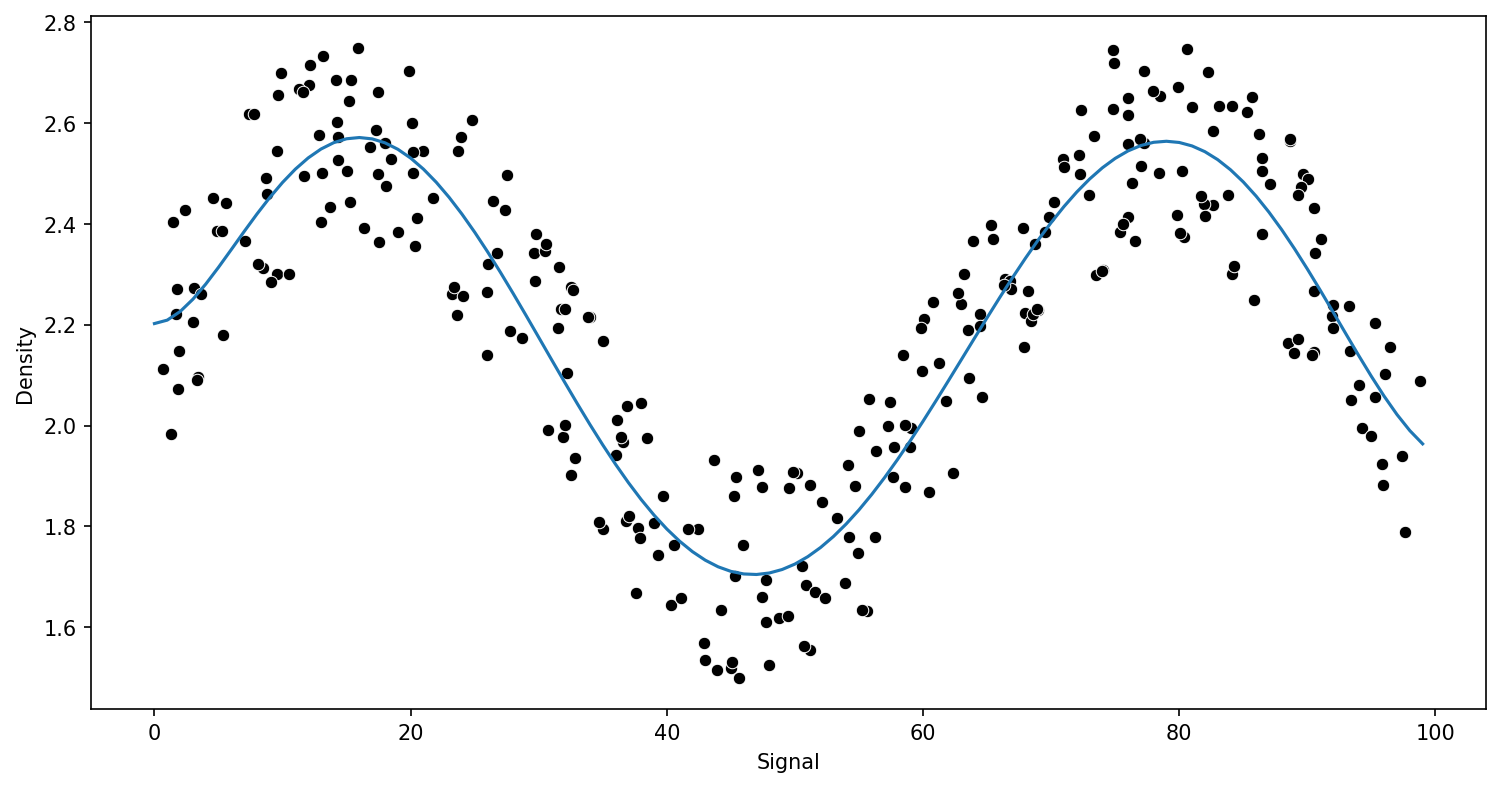

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures  #多項式
pipe = make_pipeline(PolynomialFeatures(8),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

RMSE : 0.1523487028635337


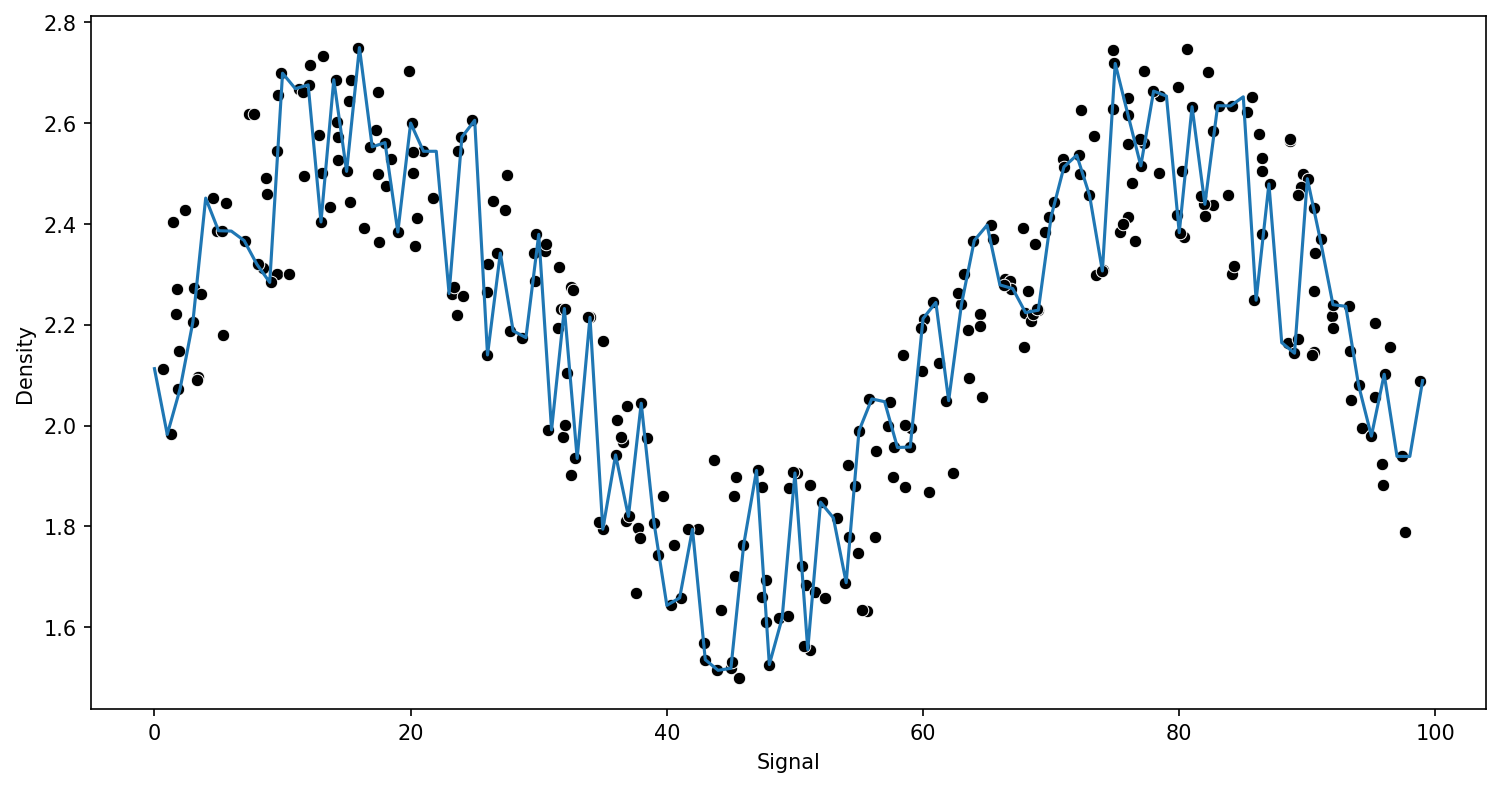

In [7]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

run_model(model,X_train,y_train,X_test,y_test)


RMSE : 0.1455289205684362
RMSE : 0.13686690976349772
RMSE : 0.13494430552517794


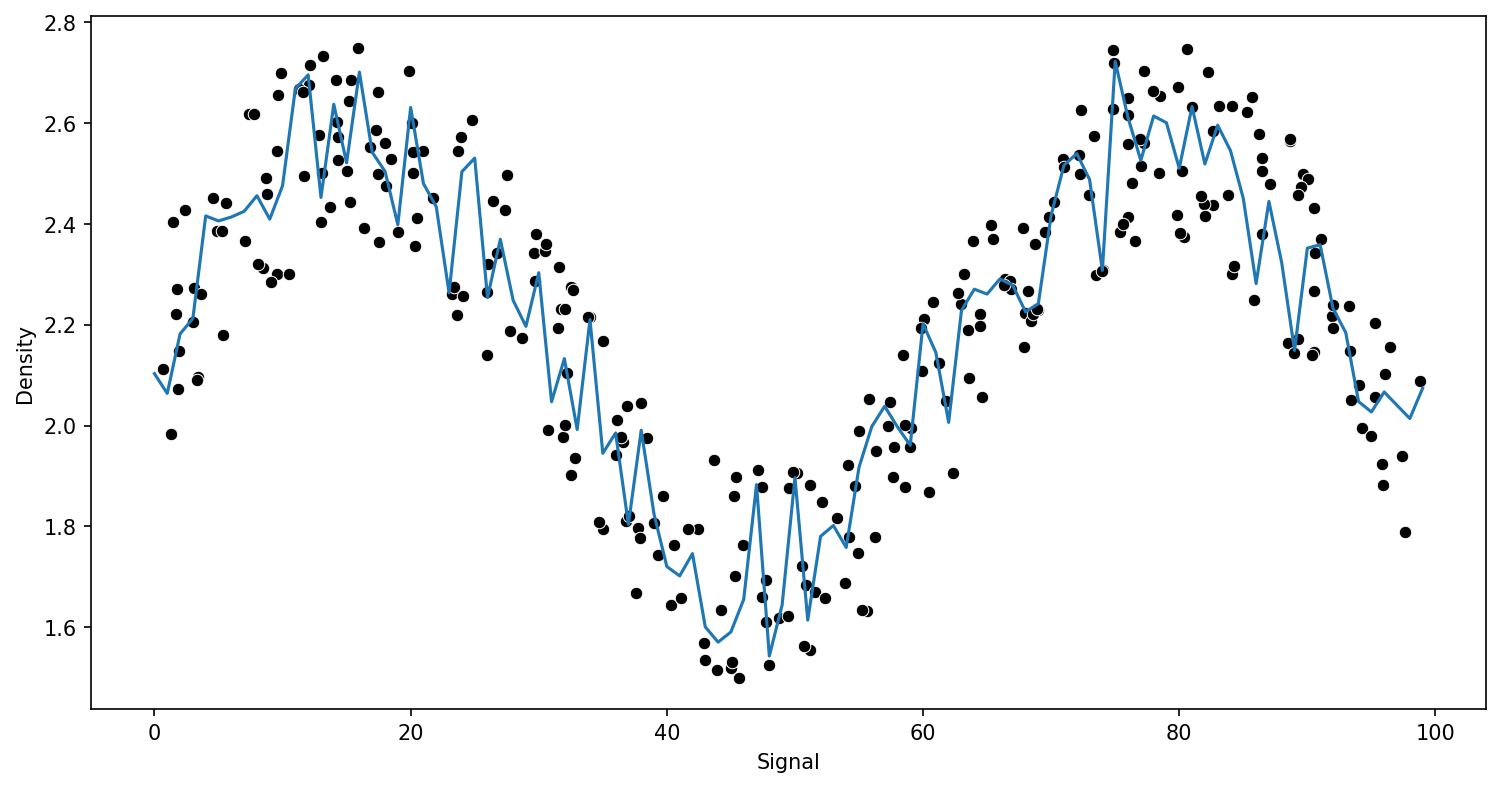

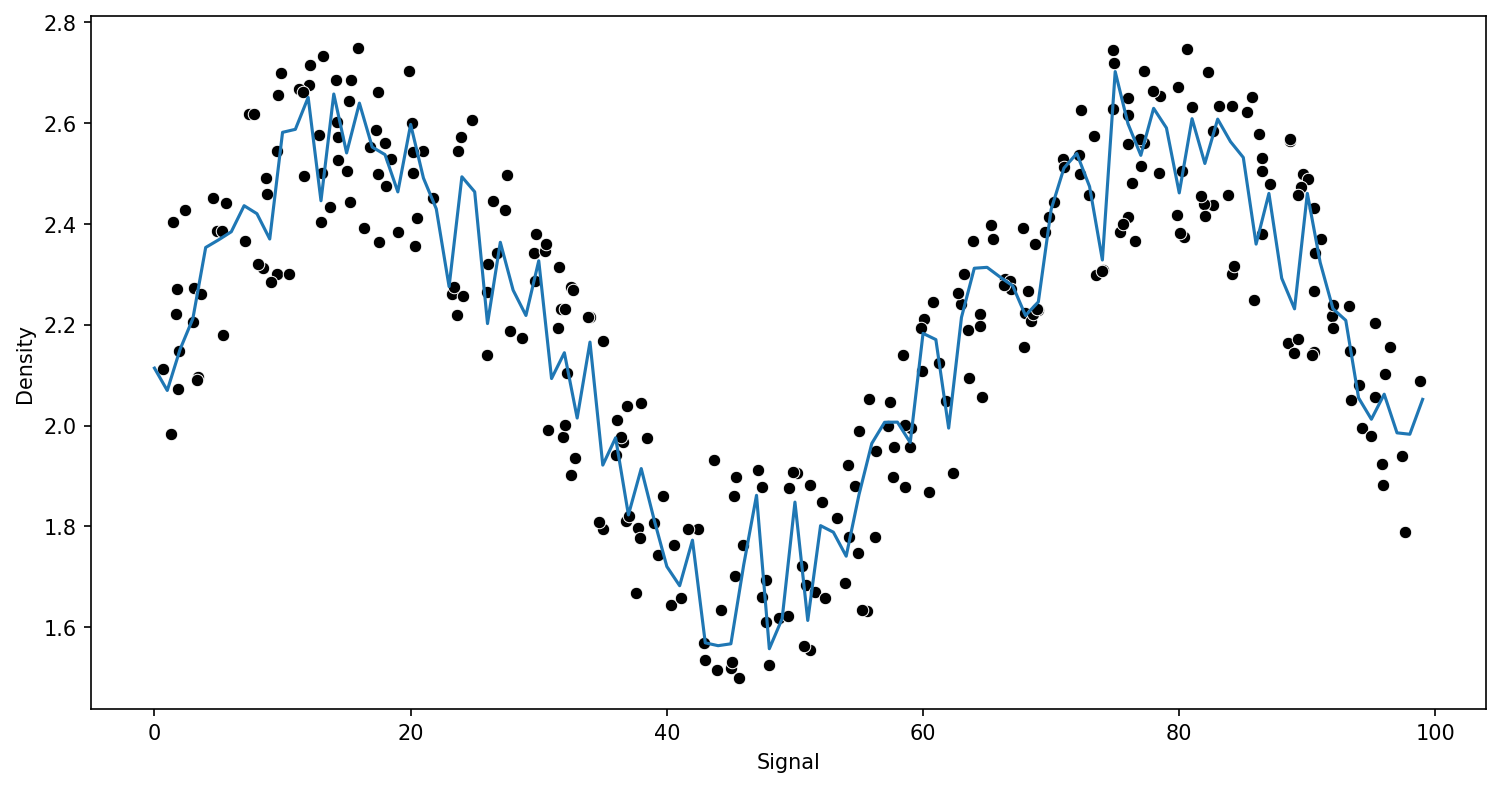

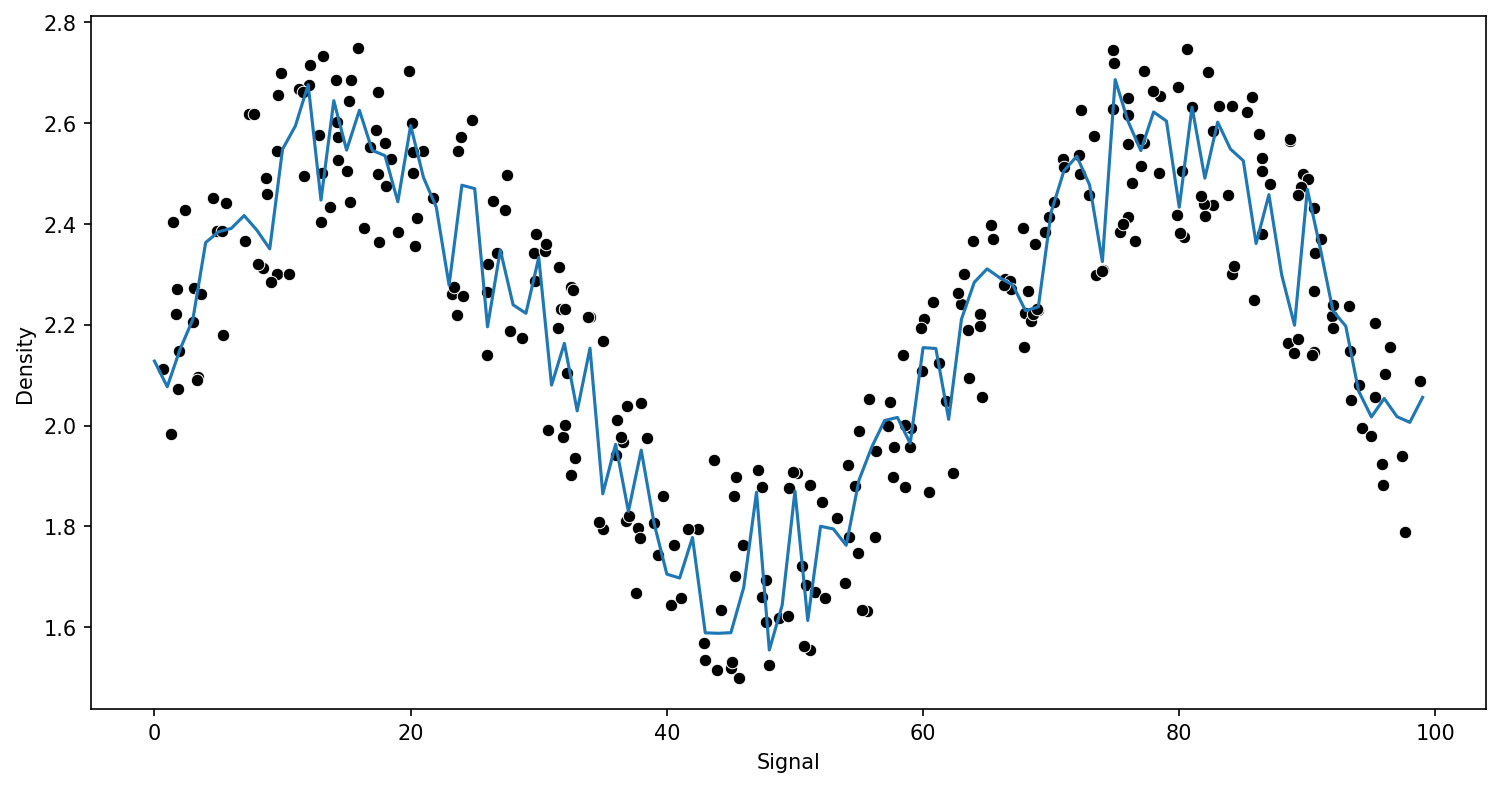

In [8]:
from sklearn.ensemble import RandomForestRegressor
trees = [10,50,100]
for n in trees:
    
    model = RandomForestRegressor(n_estimators=n)
    
    run_model(model,X_train,y_train,X_test,y_test)

## 整體學習演算法

# 多數決演算法(VotingClassifier)測試

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
X, y = datasets.load_breast_cancer(return_X_y=True)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [5]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB

estimators = [('svc', SVC()), ('rf', RandomForestClassifier()), ('nb', GaussianNB())]
clf = VotingClassifier(estimators)
clf.fit(X_train_std, y_train)

VotingClassifier(estimators=[('svc', SVC()), ('rf', RandomForestClassifier()),
                             ('nb', GaussianNB())])

In [6]:
# 計算準確率
print(f'{clf.score(X_test_std, y_test)*100:.2f}%')

98.25%


In [7]:
svc = SVC()
svc.fit(X_train_std, y_train)
print(f'{svc.score(X_test_std, y_test)*100:.2f}%') 

99.12%


In [8]:
rf = RandomForestClassifier()
rf.fit(X_train_std, y_train)
print(f'{rf.score(X_test_std, y_test)*100:.2f}%') 

96.49%


In [9]:
nb = GaussianNB()
nb.fit(X_train_std, y_train)
print(f'{nb.score(X_test_std, y_test)*100:.2f}%') 

93.86%


# Bagging演算法測試

In [10]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
X, y = datasets.load_breast_cancer(return_X_y=True)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [14]:
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB

base_estimator = GaussianNB()#挑一個算法
clf = BaggingClassifier(estimator=base_estimator, n_estimators=50)
clf.fit(X_train_std, y_train)

BaggingClassifier(estimator=GaussianNB(), n_estimators=50)

In [16]:
print(f'{clf.score(X_test_std, y_test)*100:.2f}%')

97.37%


## 強化法(Boosting) 

# 

### AdaBoost模型評估

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_digits

In [22]:
dataset = load_digits()
X = dataset['data']
y = dataset['target']

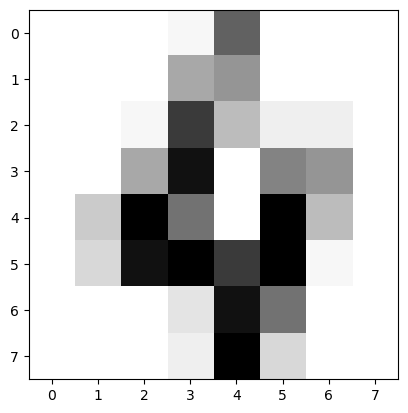

In [26]:
plt.imshow(X[4].reshape(8,8),cmap='Greys')

In [34]:
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=7), algorithm="SAMME")
scores_ada = cross_val_score(clf, X, y, cv=6)
print(scores_ada.mean())

0.9499163879598661


# XGBoost測試

In [43]:
import numpy as np
from xgboost import XGBRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [44]:
# 載入波士頓房價數據集
boston = datasets.fetch_california_housing()
X = boston.data
y = boston.target

In [46]:
boston =  pd.read_csv("california_housing_dataset.csv")
X = boston.drop(["Target"],axis=1)
y = boston["Target"]

In [37]:
# 將數據分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
# 初始化XGBRegressor模型
model = XGBRegressor()

In [39]:
# 訓練模型
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [40]:
# 使用模型進行預測
y_pred = model.predict(X_test)

In [41]:
# 計算均方誤差（MSE）
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.2225899267544737


## Kmeans

In [47]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

In [48]:
import numpy as np
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)
# 150筆資料 2個特徵 分成3群 標準差0.5 是否重新洗牌shuffle

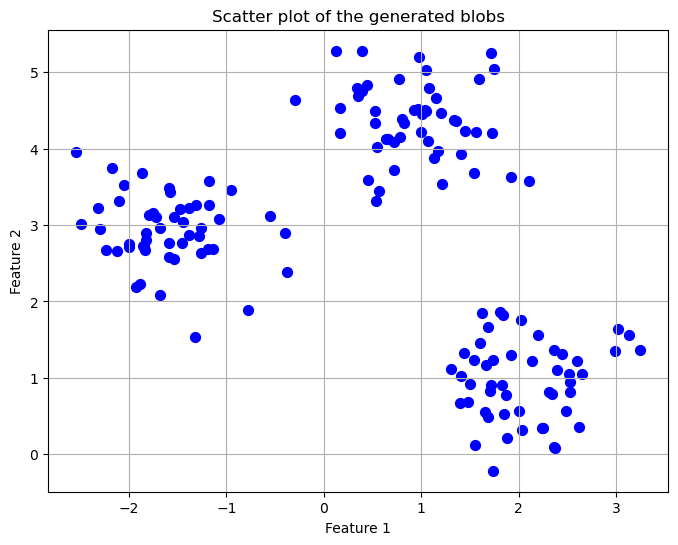

In [49]:
import matplotlib.pyplot as plt
# 繪製散佈圖
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', s=50)
plt.title("Scatter plot of the generated blobs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

## init：
random：隨機指定質心。

k-means++：依樣本點與既有質心的距離平方和(inertia_)，愈遠的樣本點愈有機會被選擇為下一個質心。詳閱『K-means聚類演算法的三種改進』。

## n_init='auto'：

且init='k-means++'時n_init=1，表k-means++只執行一次。

且init=‘random’時n_init=10，表執行隨機指定質心10次，選擇其中最好的一次。



In [50]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, 
            init='k-means++',            
            max_iter=300,
            random_state=0)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


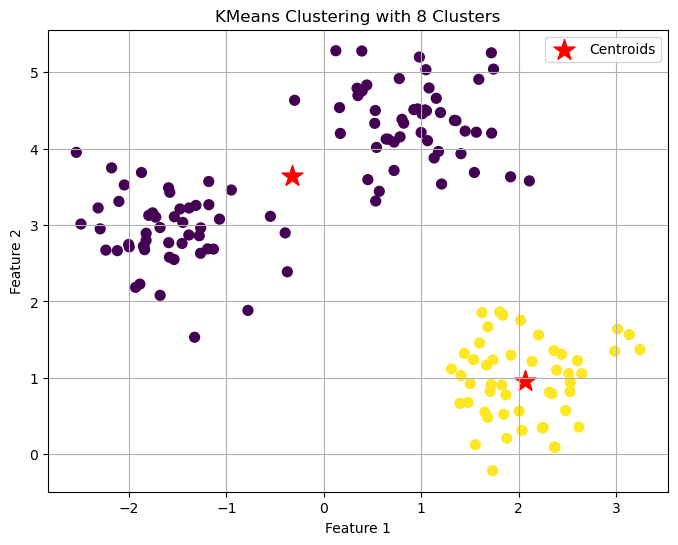

In [51]:
# 執行聚類並取得分組結果
y_km = km.fit_predict(X)

# 繪製聚類結果的散佈圖
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_km, marker='o', s=50, cmap='viridis')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], 
            s=250, marker='*', c='red', label='Centroids')
plt.title("KMeans Clustering with 8 Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

In [52]:
# 顯示失真(Distortion)的程度 越小越好
# 這個值越小表示分群效果越好，因為這意味著資料點與其群組中心之間的距離較小，群組內的凝聚力較高。
y_km = km.fit_predict(X)                  
print('Distortion: %.2f' % km.inertia_)

Distortion: 283.46


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## 繪製輪廓圖

pip install yellowbrick

## 輪廓分數（Silhouette Score）

是一種衡量分群質量的指標，範圍在 -1 到 1 之間。其分數反映了資料點在分群中的適合程度：

- **接近 1**：表示資料點非常適合當前的群組，且與其他群組的資料點有明顯的距離。這表示該資料點與其分群的相似性高，與其他群組的相似性低，分群效果理想。
  
- **接近 0**：表示資料點位於兩個群組的邊界，可能不適合任何群組或有可能被分到不同的群組。這種情況下，分群效果不明顯，可能需要重新調整分群方法或群數。
  
- **接近 -1**：表示資料點更適合其他群組，而不是當前的群組，這是分群質量差的指標。

因此，**輪廓分數愈接近 1 愈好**，因為這表示資料點明顯屬於某一群組，且與其他群組的資料點有較大的區別，分群的效果較好。這通常是優秀分群模型的特徵。

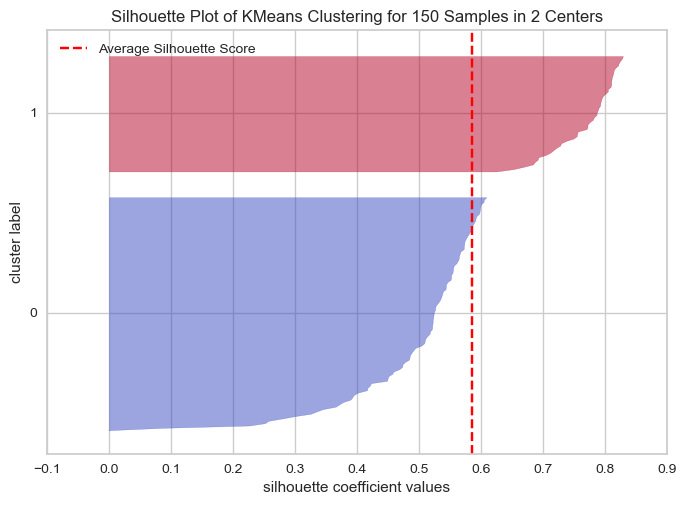

Silhouette Average: 0.58


In [53]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
visualizer = SilhouetteVisualizer(km, colors='coolwarm')
visualizer.fit(X)
visualizer.show()

silhouette_avg = silhouette_score(X, km.labels_)
print(f'Silhouette Average: {silhouette_avg:.2f}')

## 轉折判斷法(Elbow)

In [54]:
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters=i, 
                init='k-means++',            
                max_iter=300,
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

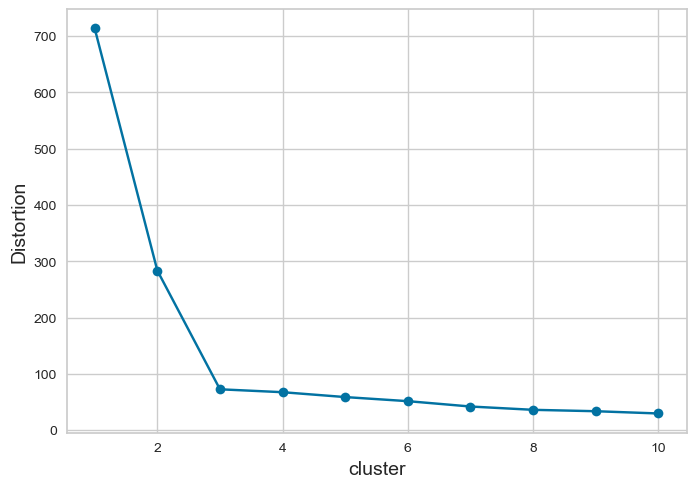

In [55]:
import matplotlib.pyplot as plt
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('cluster', fontsize=14)
plt.ylabel('Distortion', fontsize=14);#失真

In [56]:
km = KMeans(n_clusters=3, 
                init='k-means++',            
                max_iter=300,
                random_state=0)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


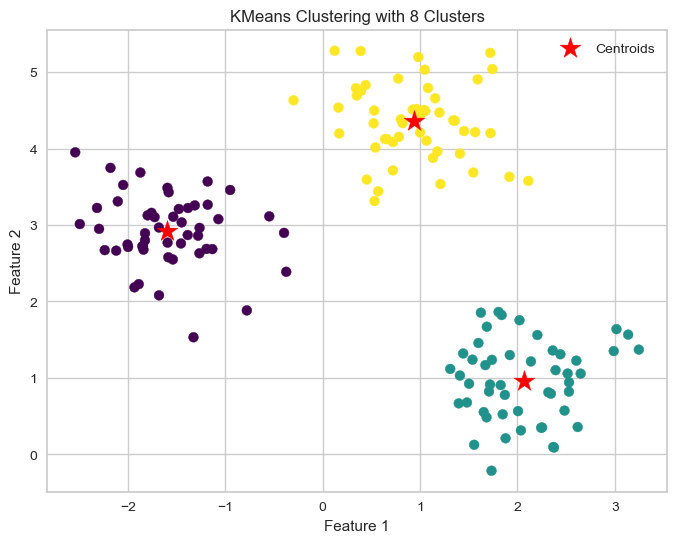

In [57]:
# 執行聚類並取得分組結果
y_km = km.fit_predict(X)

# 繪製聚類結果的散佈圖
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_km, marker='o', s=50, cmap='viridis')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], 
            s=250, marker='*', c='red', label='Centroids')
plt.title("KMeans Clustering with 8 Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

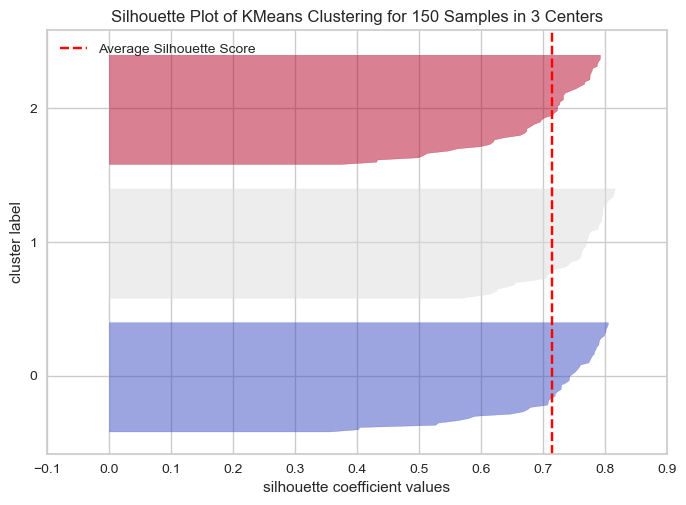

Silhouette Average: 0.71


In [58]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
visualizer = SilhouetteVisualizer(km, colors='coolwarm')
visualizer.fit(X)
visualizer.show()

silhouette_avg = silhouette_score(X, km.labels_)
print(f'Silhouette Average: {silhouette_avg:.2f}')

## 使用輪廓係數找最佳分類數

In [59]:
import numpy as np
# 測試 2~10 群的分數
silhouette_score_list = []
print('輪廓分數愈接近1愈好:')
for i in range(2, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    y_km = km.fit_predict(X)#KMeansn算出的標籤
    silhouette_score_list.append(silhouette_score(X, y_km))
    print(f'{i}:{silhouette_score_list[-1]:.2f}')

print(f'最大值 {np.argmax(silhouette_score_list)+2}: {np.max(silhouette_score_list):.2f}')

輪廓分數愈接近1愈好:
2:0.58
3:0.71
4:0.57
5:0.44
6:0.46


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

7:0.32
8:0.33
9:0.34
10:0.35
最大值 3: 0.71


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

# 凝聚階層集群(Agglomerative Hierarchical Clustering, AHC)

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
from sklearn.cluster import AgglomerativeClustering
# 生成一些二維數據
np.random.seed(42)
X = np.random.rand(50, 2)
print(X.shape)

(50, 2)


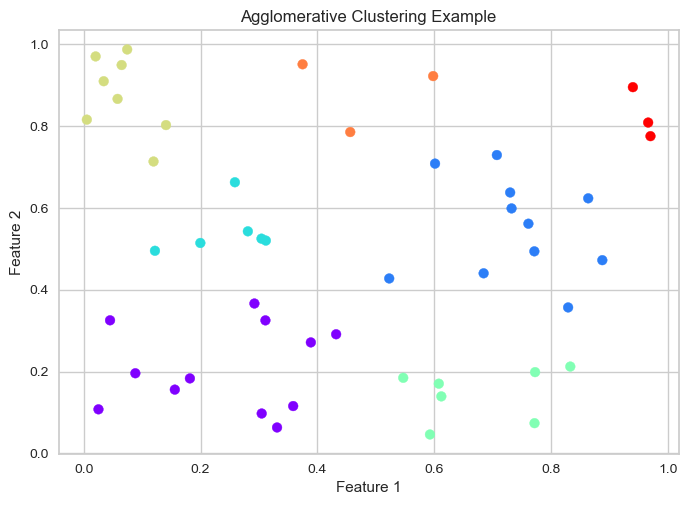

In [62]:
# 使用AgglomerativeClustering進行聚類
clustering = AgglomerativeClustering(n_clusters=7)
clustering.fit(X)

# 繪製結果
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_, cmap='rainbow')
plt.title("Agglomerative Clustering Example")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [63]:
from sklearn.metrics import silhouette_score
silhouette_score(X,clustering.labels_)

0.45818858824014347

In [64]:
# 測試 2~10 群的分數
silhouette_score_list = []
print('輪廓分數愈接近1愈好:')
for i in range(2, 11):
    clustering = AgglomerativeClustering(n_clusters=i)
    y_km = clustering.fit_predict(X)
    silhouette_score_list.append(silhouette_score(X, y_km))
    print(f'{i}:{silhouette_score_list[-1]:.2f}')
print(f'最大值 {np.argmax(silhouette_score_list) + 2}: {np.max(silhouette_score_list):.2f}')

輪廓分數愈接近1愈好:
2:0.35
3:0.43
4:0.42
5:0.43
6:0.43
7:0.46
8:0.47
9:0.44
10:0.46
最大值 8: 0.47


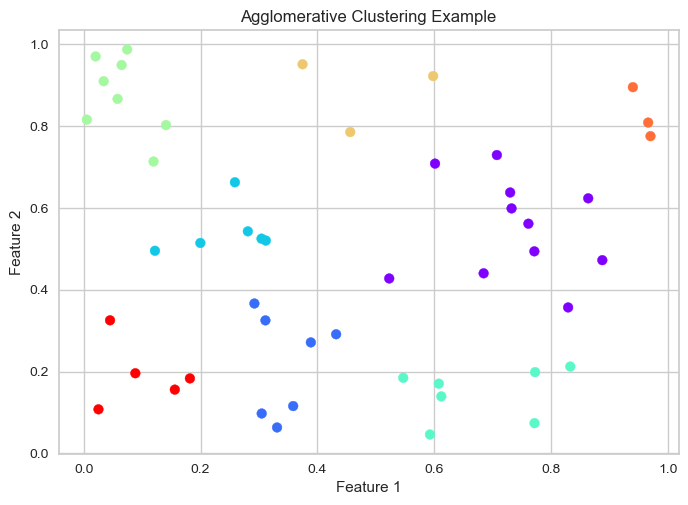

In [65]:
# 使用AgglomerativeClustering進行聚類
clustering = AgglomerativeClustering(n_clusters=8)
clustering.fit(X)

# 繪製結果
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_, cmap='rainbow')
plt.title("Agglomerative Clustering Example")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()